In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px

# Employment

In [2]:
xls = pd.read_excel("2016-2019.2022 employment.xlsx", sheet_name=['2022', '2019', '2018', '2017', '2016'])

# Access individual sheets using sheet names

selected = ["State Abbreviation", "State", "State Code", "BLS Total State Employment", "Solar Electric Power Generation Employment",
            "Wind Electric Power Generation Employment", "Traditional Hydroelectric Electric Power Generation Employment",
            "Natural Gas Electric Power Generation Employment", "Coal Electric Power Generation Employment",
            "Oil & Other Fossil Fuels Electric Power Generation Employment", #"Other Electric Power Generation Employment",
            "Electric Power Generation Employment", "Storage Employment", "Smart Grid Employment",
            "Micro Grid & Other (including commodity flows) Employment", "Transmission, Distribution, and Storage Employment",
            "ENERGY STAR & Efficient Lighting Employment", "Traditional HVAC Employment",
            "High Efficiency HVAC & Renewable Heating and Cooling Employment",
            "Advanced Materials Employment", # "Other Energy Efficiency Employment",
            "Energy Efficiency Employment", "Coal Fuels Employment", "Oil (Petroleum & Other Fossil Fuels) Employment",
            "Natural Gas Fuels Employment", "Corn Ethanol Fuels Employment", # "Other Ethanol / Non-woody Biomass Fuels Employment",
            "Woody Biomass Fuels Employment", # "Other Fuels Employment",
            "Fuels Employment",
            "Motor Vehicles Employment"]

df2022 = xls['2022'][selected][0:51]
df2019 = xls['2019'][selected][0:51]
df2018 = xls['2018'][selected][0:51]
df2017 = xls['2017'][selected][0:51]
df2016 = xls['2016'][selected][0:51]
# Initialize an empty dataframe for concatenation
data = pd.DataFrame()
all = {
    2016: df2016,
    2017: df2017,
    2018: df2018,
    2019: df2019,
    2022: df2022
}
# Iterate over the file paths, read the data, add a 'year' column, and concatenate
for year, df in all.items():
    # Add a 'year' column
    df['year'] = year
    # Concatenate with the main dataframe
    data = pd.concat([data, df], ignore_index=True)
data.fillna(0, inplace=True)
data.head()

,State Abbreviation,State,State Code,BLS Total State Employment,Solar Electric Power Generation Employment,Wind Electric Power Generation Employment,Traditional Hydroelectric Electric Power Generation Employment,Natural Gas Electric Power Generation Employment,Coal Electric Power Generation Employment,Oil & Other Fossil Fuels Electric Power Generation Employment,...,Advanced Materials Employment,Energy Efficiency Employment,Coal Fuels Employment,Oil (Petroleum & Other Fossil Fuels) Employment,Natural Gas Fuels Employment,Corn Ethanol Fuels Employment,Woody Biomass Fuels Employment,Fuels Employment,Motor Vehicles Employment,year
0,AL,Alabama,1.0,1902627.0,759.572581,1076.800001,349.845572,1656.771076,1529.479797,203.915033,...,18936.583832,30203.125729,2540.274958,3398.131576,911.508737,53.678765,1046.752796,10837.636196,63174.401475,2016
1,AK,Alaska,2.0,318226.0,97.831293,36.856133,468.995229,292.810922,88.009128,151.338420,...,1496.329367,4420.910304,133.882687,7395.071294,5873.885176,0.000000,45.329253,13503.515031,3459.662072,2016
2,AZ,Arizona,3.0,2679452.0,9774.185235,693.516394,151.243695,3648.663567,6060.030942,154.111824,...,7750.570242,40663.011649,432.561601,302.964923,173.684848,52.110960,64.130977,1081.222314,29292.997452,2016
3,AR,Arkansas,4.0,1191095.0,338.634586,824.624931,33.495728,328.776274,310.937391,0.103852,...,619.843354,14832.756840,115.309010,3935.978424,1722.581392,348.587634,650.874528,7798.967549,19839.610516,2016
4,CA,California,5.0,16454823.0,152947.243575,4634.885519,11890.487256,16959.720293,864.315681,695.693162,...,18473.448002,301347.974072,1322.670889,48566.120142,10687.139987,246.498991,2629.493311,68984.241017,198121.348153,2016


<ipython-input-3-f126400587b9>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


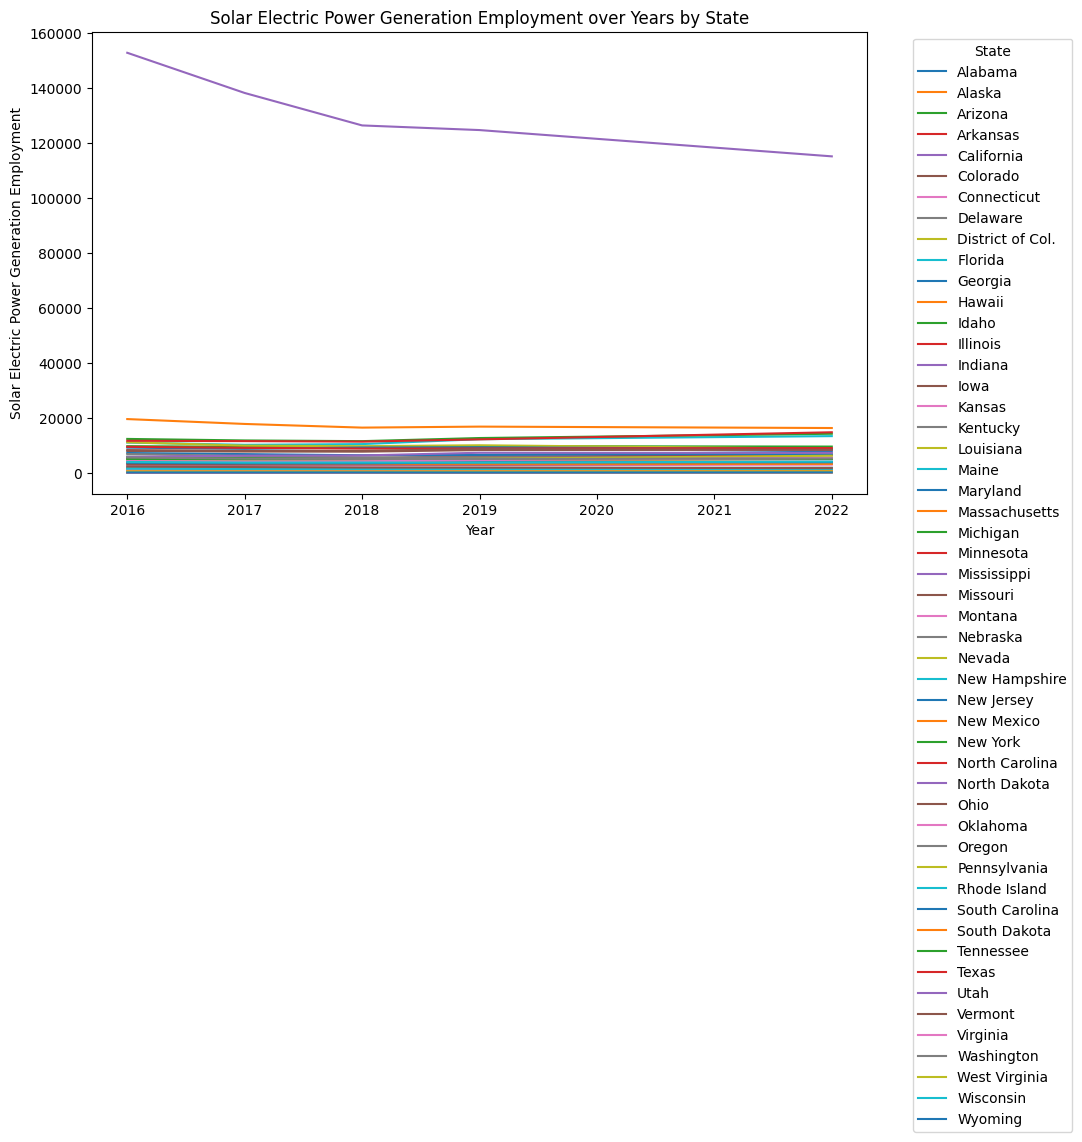

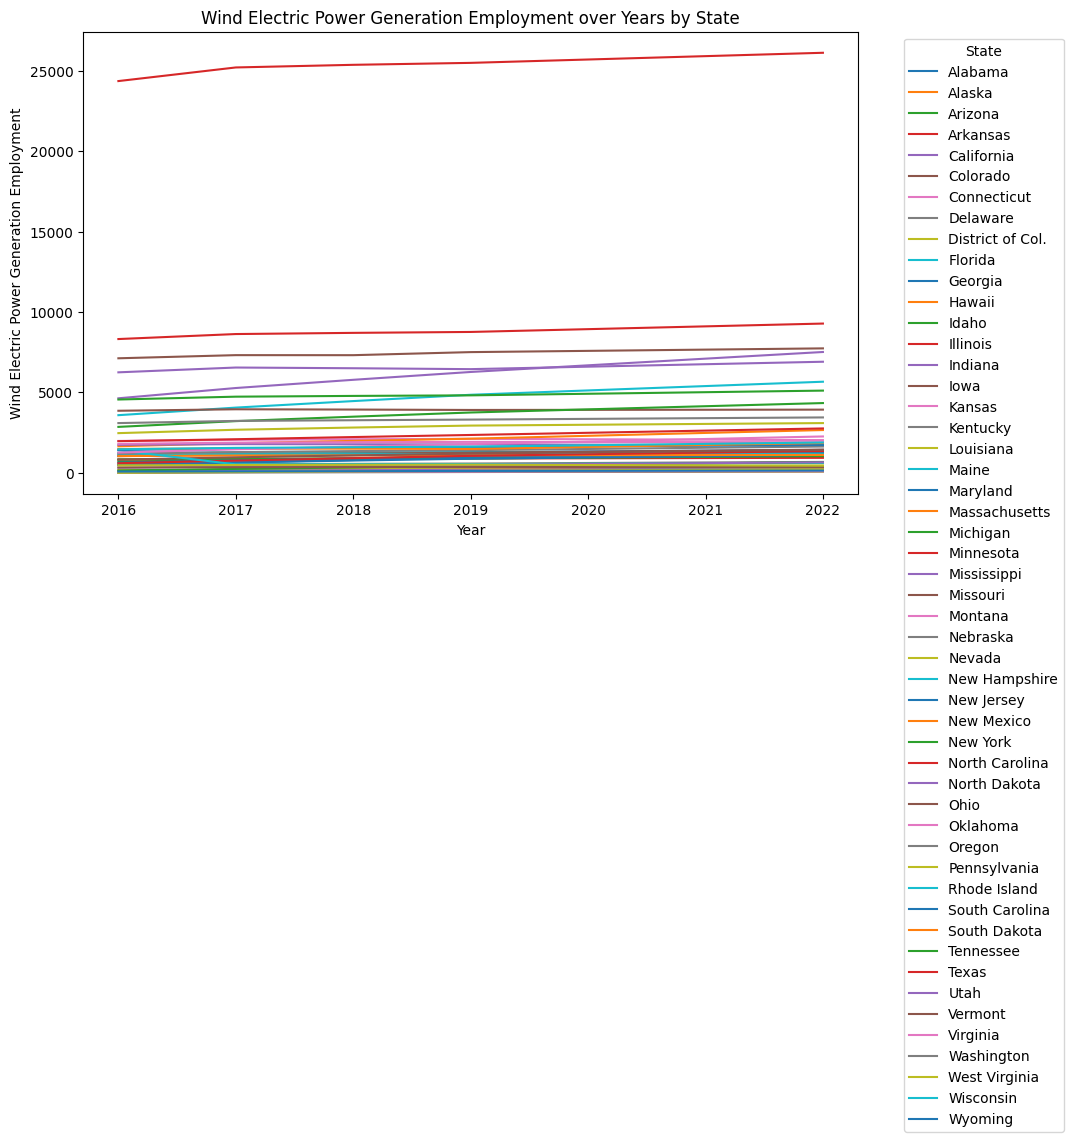

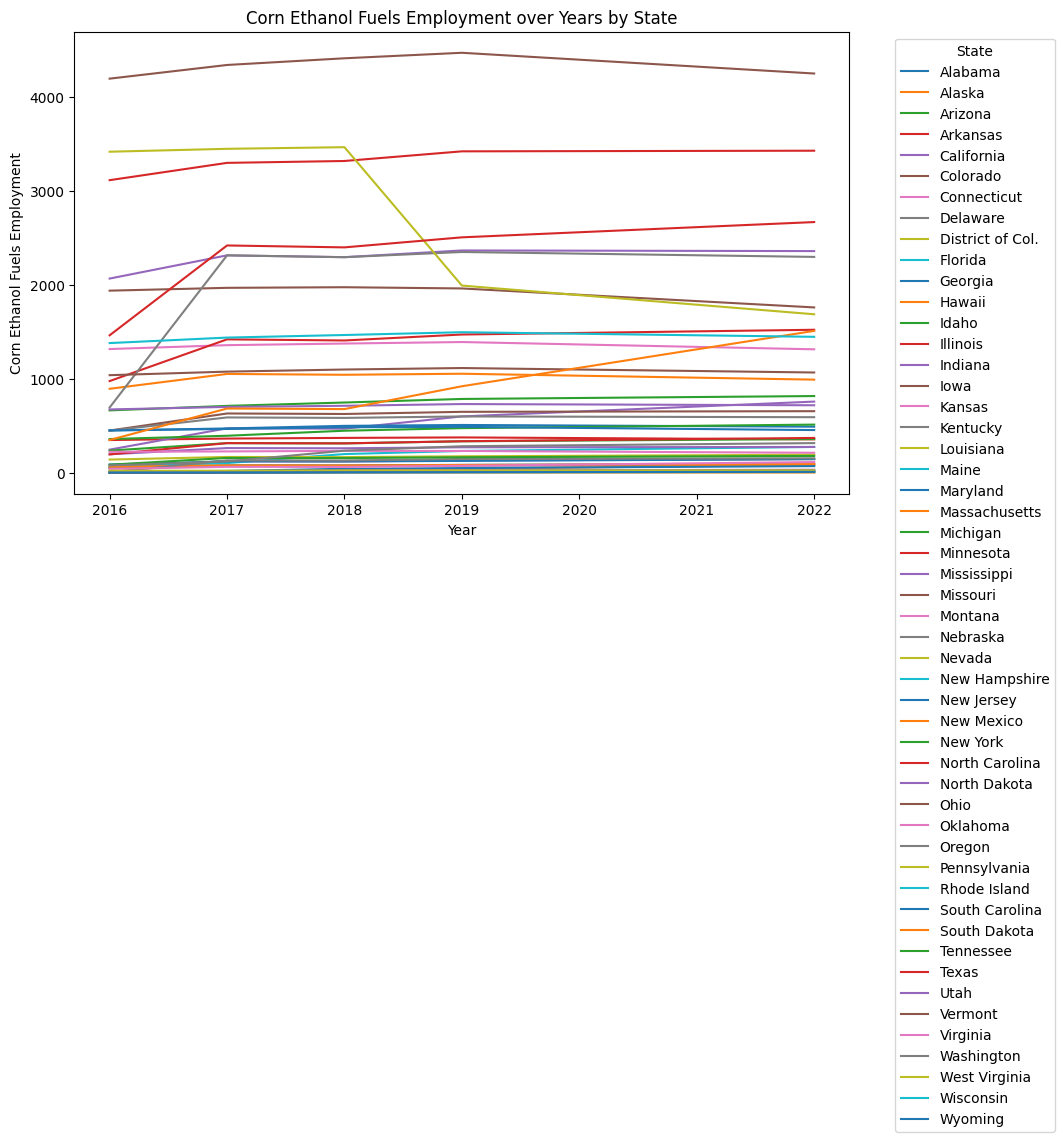

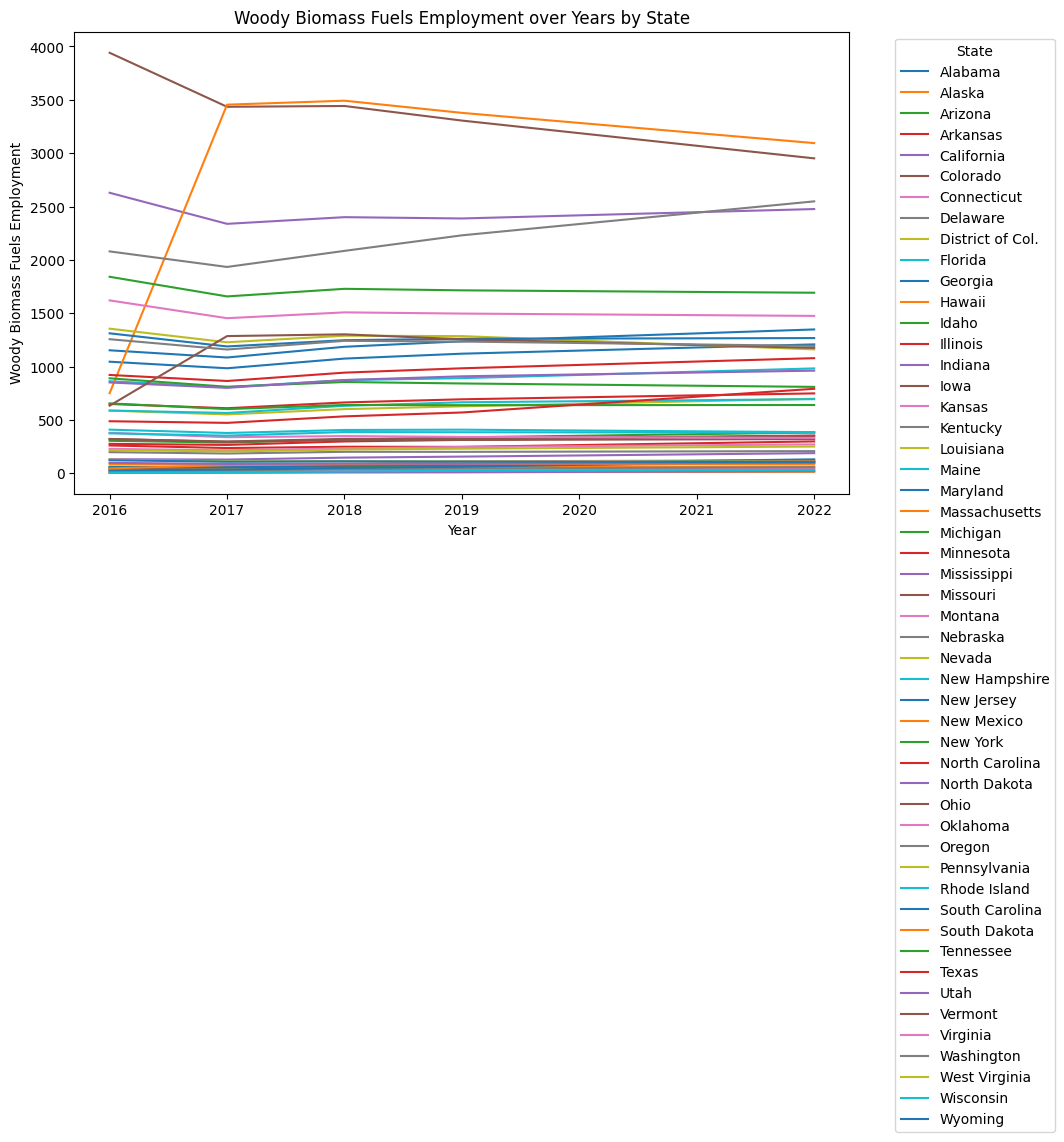

In [3]:
clean = ['Solar Electric Power Generation Employment', "Wind Electric Power Generation Employment",
         "Corn Ethanol Fuels Employment", "Woody Biomass Fuels Employment"]
for column in clean:
    plt.figure(figsize=(10, 6))
    for state in data['State'].unique():
        state_data = data[data['State'] == state]
        plt.plot(state_data['year'], state_data[column], label=state)
    plt.title(f"{column} over Years by State")
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

<ipython-input-4-960070043cad>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


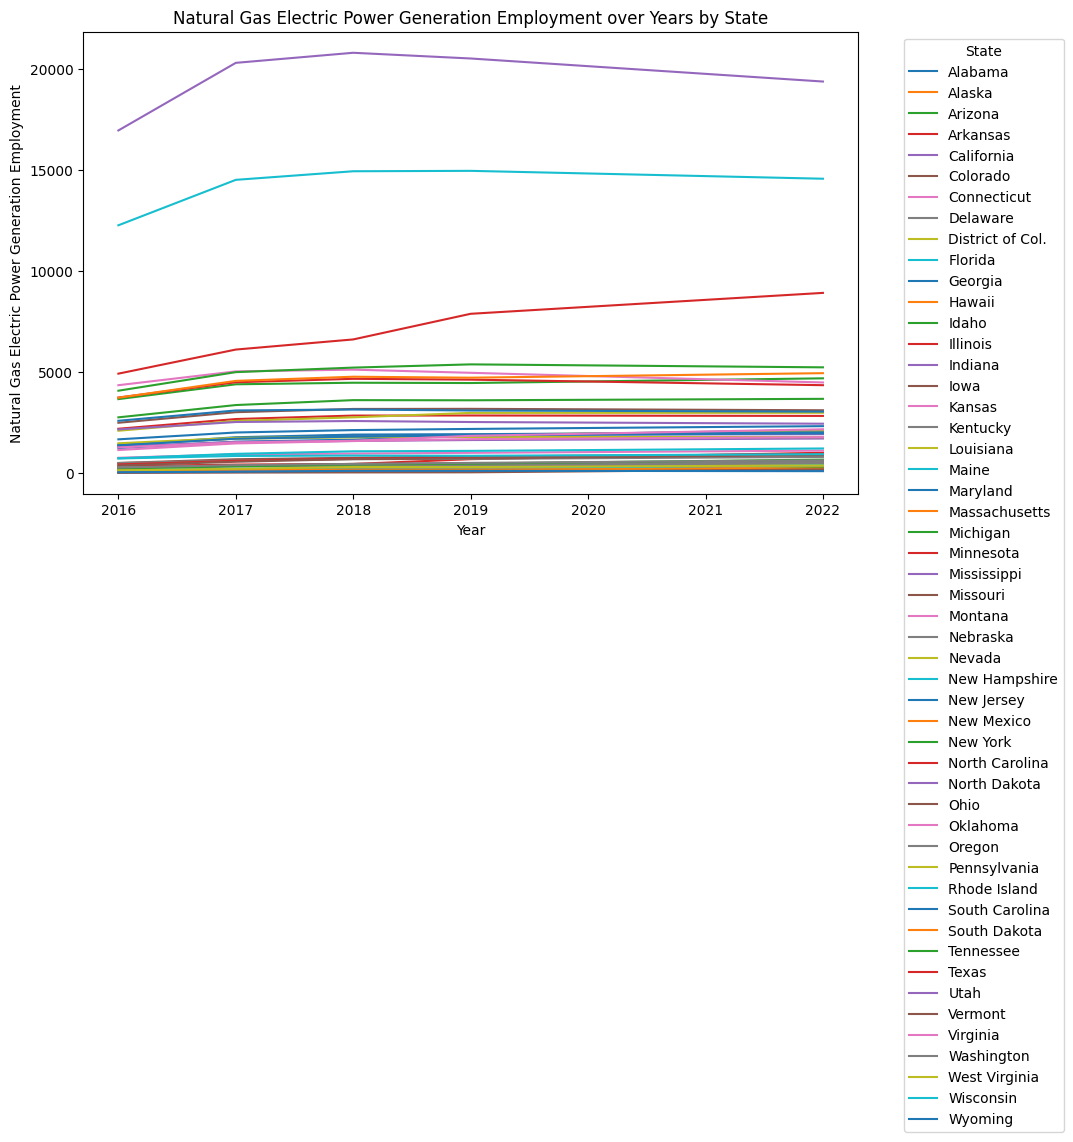

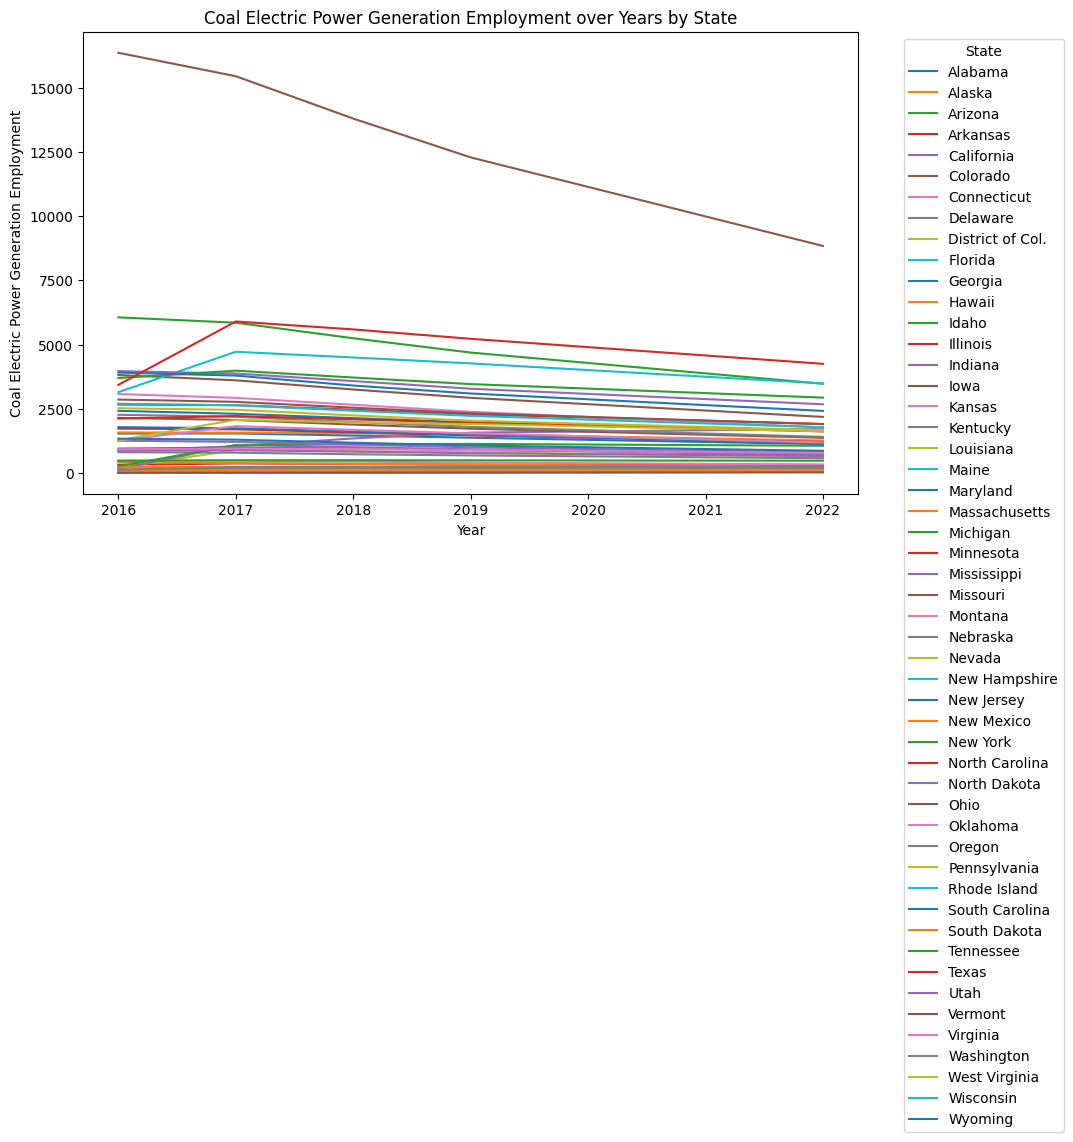

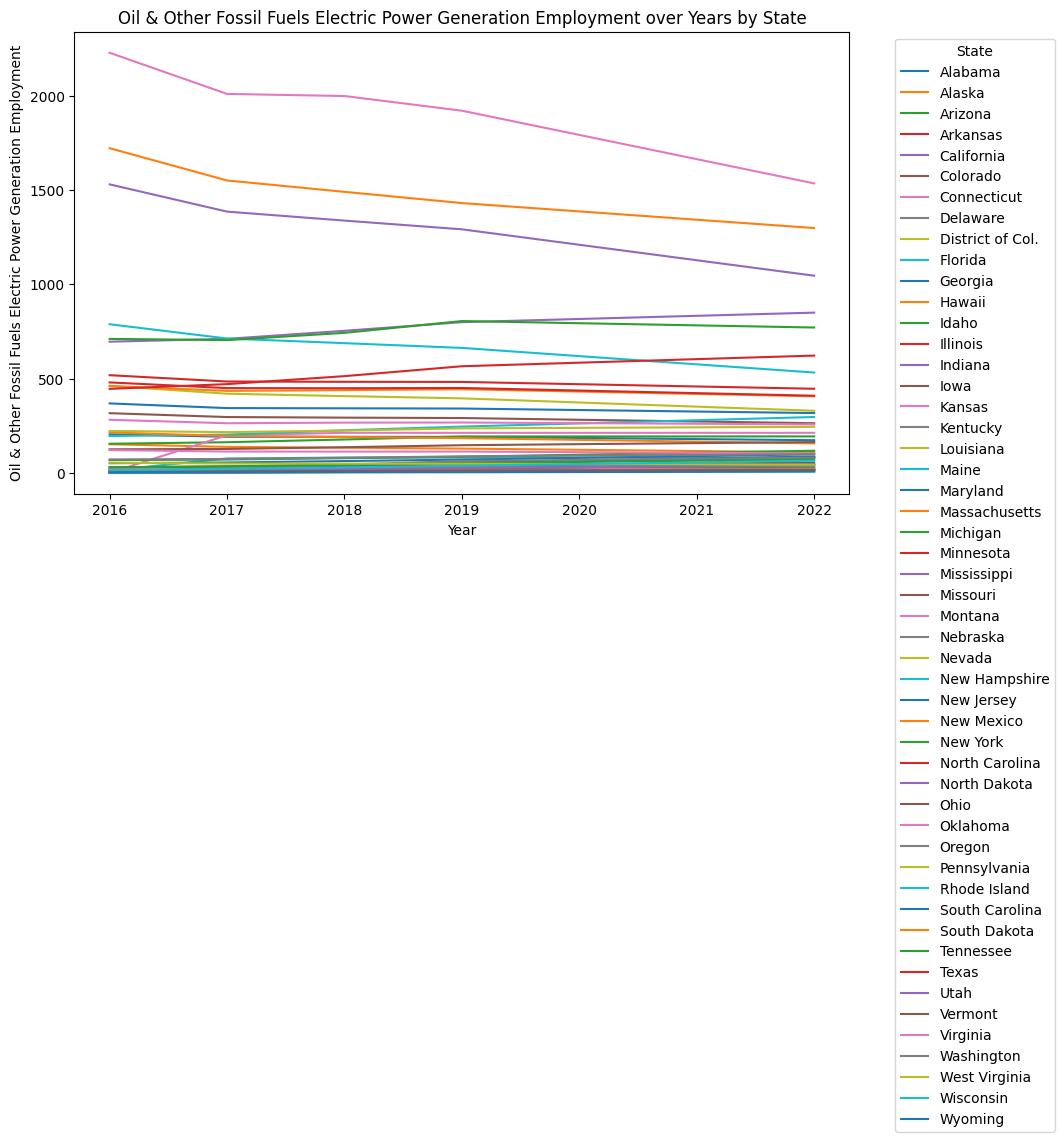

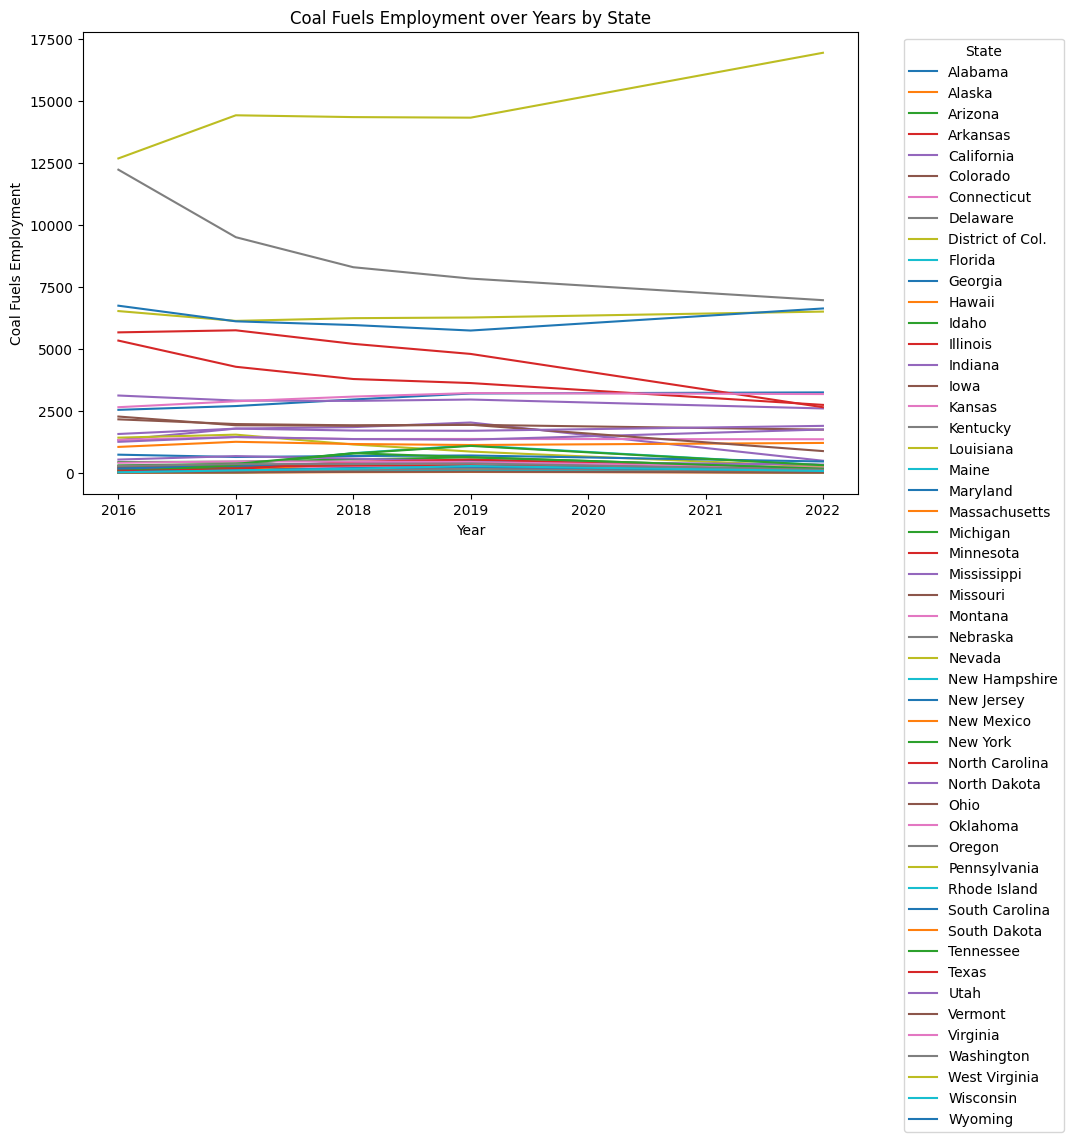

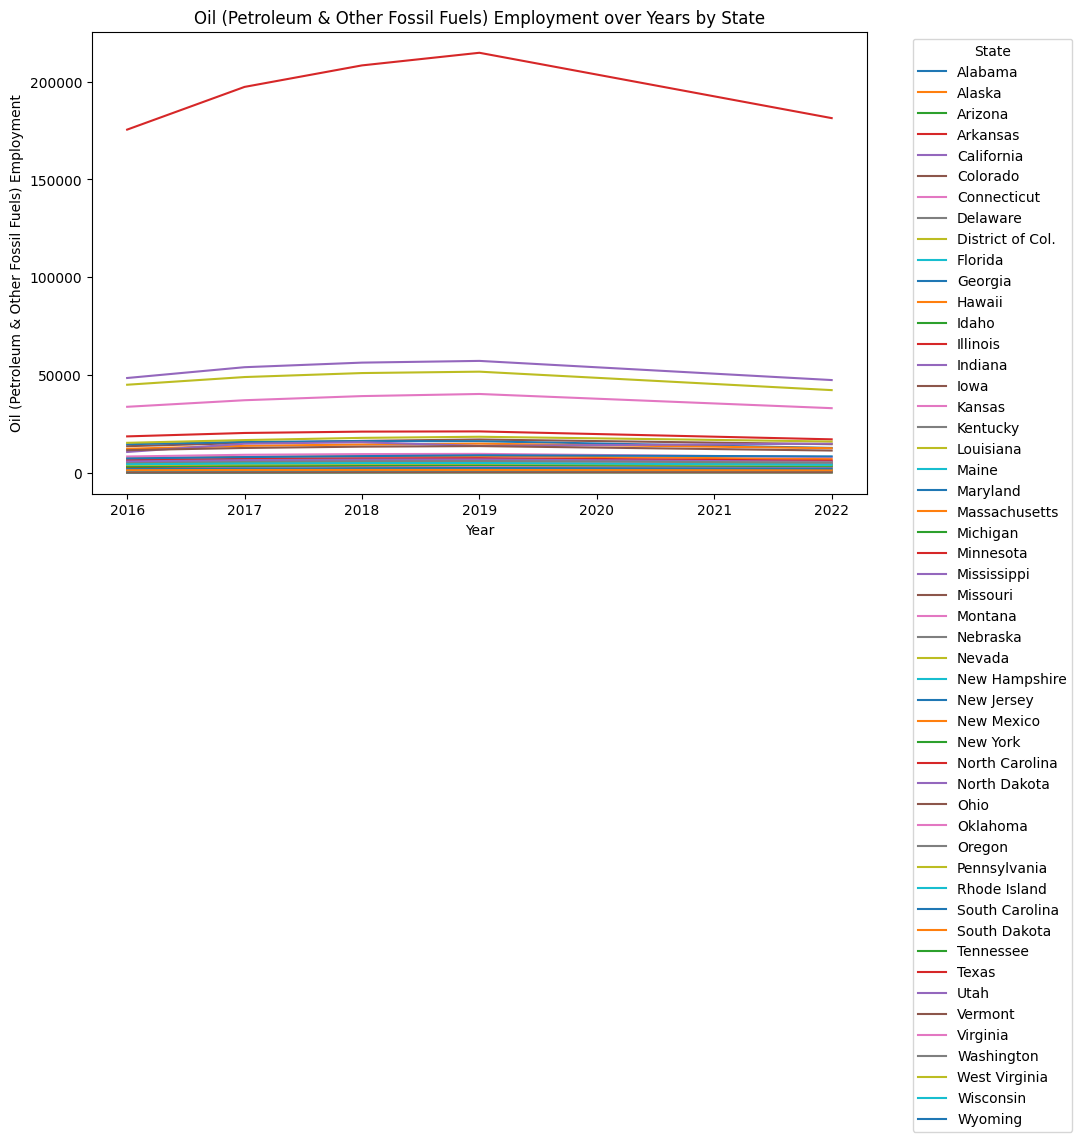

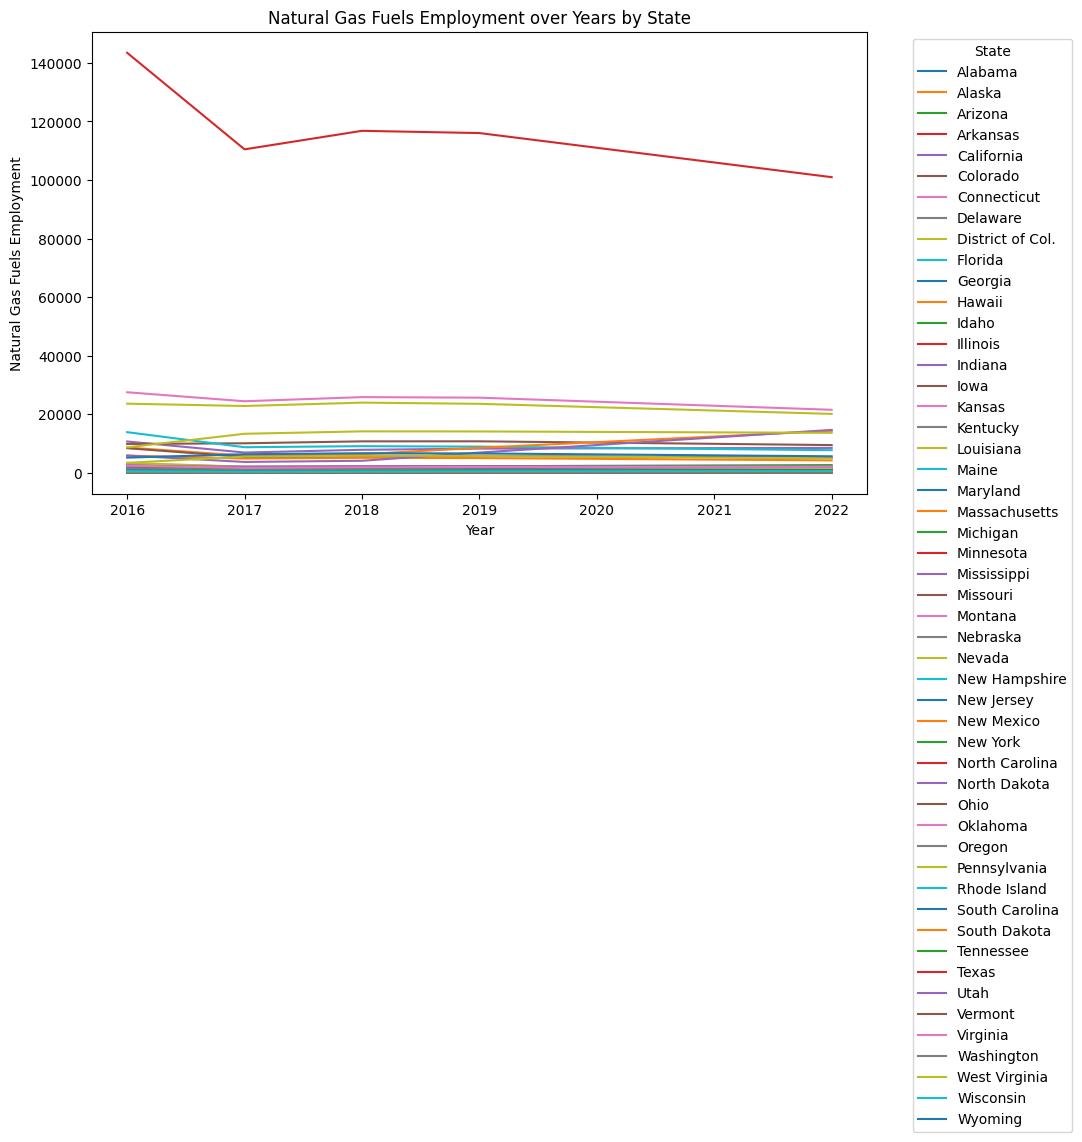

In [4]:
not_clean = ["Natural Gas Electric Power Generation Employment", "Coal Electric Power Generation Employment",
             "Oil & Other Fossil Fuels Electric Power Generation Employment", "Coal Fuels Employment",
             "Oil (Petroleum & Other Fossil Fuels) Employment", "Natural Gas Fuels Employment"]
for column in not_clean:
    plt.figure(figsize=(10, 6))
    for state in data['State'].unique():
        state_data = data[data['State'] == state]
        plt.plot(state_data['year'], state_data[column], label=state)
    plt.title(f"{column} over Years by State")
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plotly charts cannot be displayed in GitHub, but the following codes are supposed to generate U.S. map colored by the change in employment from 2016 to 2022.

In [5]:
clean = ['Solar Electric Power Generation Employment', "Wind Electric Power Generation Employment",
         "Corn Ethanol Fuels Employment", "Woody Biomass Fuels Employment"]
for i in clean:
  data2022 = data[data['year']==2022].set_index('State')[i]
  data2016 = data[data['year']==2016].set_index('State')[i]
  df_temp = data2022.subtract(data2016)
  df_temp = df_temp.to_frame(name=i)
  fig = px.choropleth(locations=df2022["State Abbreviation"], locationmode="USA-states",
                      color=df_temp[i], scope="usa",
                      color_continuous_scale="Viridis")
  fig.update_layout(title=f"Change in {i} from 2016 to 2022",margin={"r":0,"t":30,"l":0,"b":0})
  fig.show()

In [6]:
not_clean = ["Natural Gas Electric Power Generation Employment", "Coal Electric Power Generation Employment",
             "Oil & Other Fossil Fuels Electric Power Generation Employment", "Coal Fuels Employment",
             "Oil (Petroleum & Other Fossil Fuels) Employment", "Natural Gas Fuels Employment"]
for i in not_clean:
  data2022 = data[data['year']==2022].set_index('State')[i]
  data2016 = data[data['year']==2016].set_index('State')[i]
  df_temp = data2022.subtract(data2016)
  df_temp = df_temp.to_frame(name=i)
  fig = px.choropleth(locations=df2022["State Abbreviation"], locationmode="USA-states",
                      color=df_temp[i], scope="usa",
                      color_continuous_scale="Viridis")
  fig.update_layout(title=f"Change in {i} from 2016 to 2022",margin={"r":0,"t":30,"l":0,"b":0})
  fig.show()